<h1>Analysis of 911 Calls</h1>

<strong>To examine the location and reasons for 911 Calls</strong> <br>
<strong>To give suggestions on how to restructure the medic staff </strong><br><br>
Data can be extracted from 911.csv
<br>
<a href = "https://www.kaggle.com/mchirico/montcoalert">Kaggle</a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df = pd.read_csv(r"C:\Users\ngchi\Desktop\Data Analytics\911\911.csv")

In [38]:
df.info() #Get a brief look on the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<strong>Top 5 ZipCodes for 911 Calls</strong>

In [40]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

<h1> Find out Unique Reasons for Calling 911 </h1>

In [41]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [42]:
df['Reasons'] = df['title'].apply(lambda t: t.split(":")[1])  #Separate Reasons from Department

In [43]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS


In [44]:
df['Reason'] = df['title'].apply(lambda title: title.split(":")[0])  #Get the corresponding Department

<h1>Most common reason for a 911 call</h1>

In [45]:
df['Reasons'].value_counts().head(1) 

#Vehicle Accident is the most common

 VEHICLE ACCIDENT -    148372
Name: Reasons, dtype: int64

<Strong>Countplot of 911 calls by Department</Strong>

<AxesSubplot:xlabel='Reason', ylabel='count'>

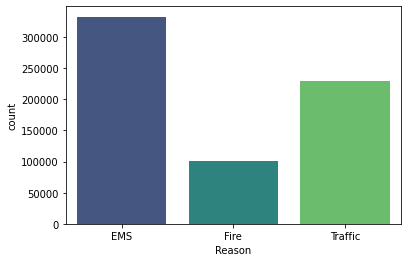

In [46]:
sns.countplot(x='Reason',data = df,palette='viridis')

#Emergency Medical Services is the most called Department

In [47]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [48]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [49]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [50]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [51]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [52]:
df['Day of Week'] = df['Day of Week'].map(dmap)

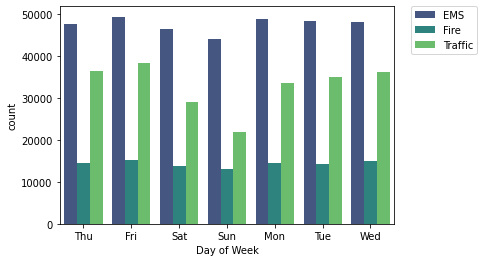

In [53]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

#Seems like regardless of any day, EMS is the most called Department. 
#Traffic seems to be less of an issue during weekends compared to weekdays

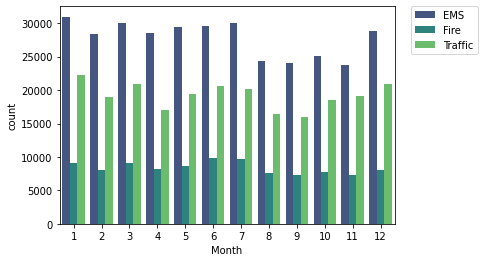

In [54]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

In [55]:
byMonth = df.groupby('Month').count()

<AxesSubplot:xlabel='Month'>

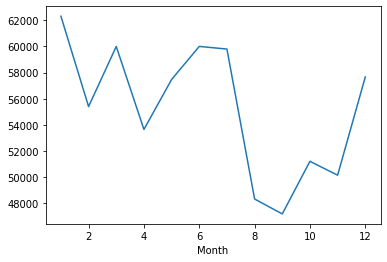

In [56]:
byMonth['twp'].plot()

#Number of total calls each month 

In [57]:
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Reason,Hour,Day of Week
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


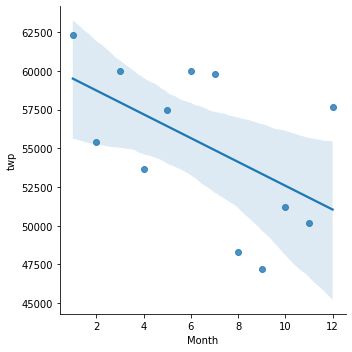

In [58]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [59]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

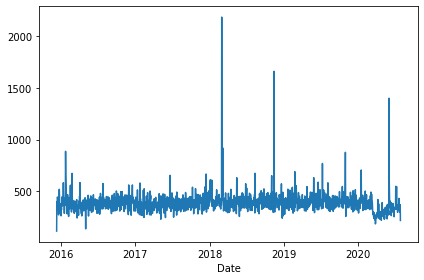

In [60]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

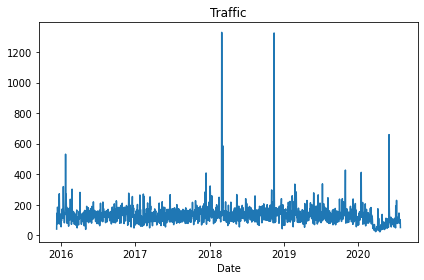

In [61]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

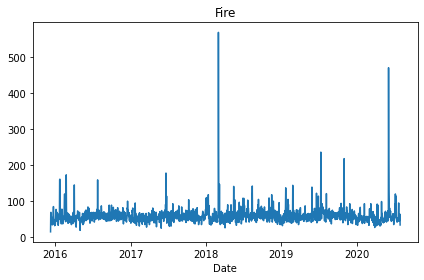

In [62]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

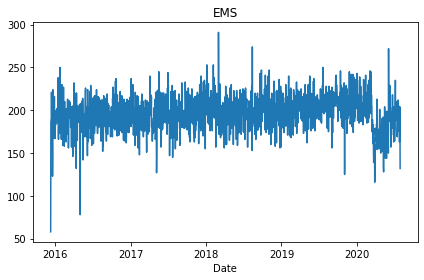

In [63]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

<h1>Using HeatMap to examine number of incident on each day & hours of the week</h1>
<br>
<Strong>Seems like 911 calls mostly happen during afternoon to evening, and primarily on weekends</Strong>


In [67]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

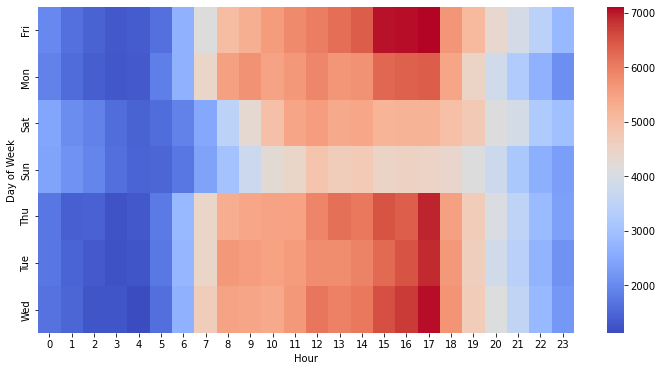

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap = 'coolwarm')

<Figure size 864x432 with 0 Axes>

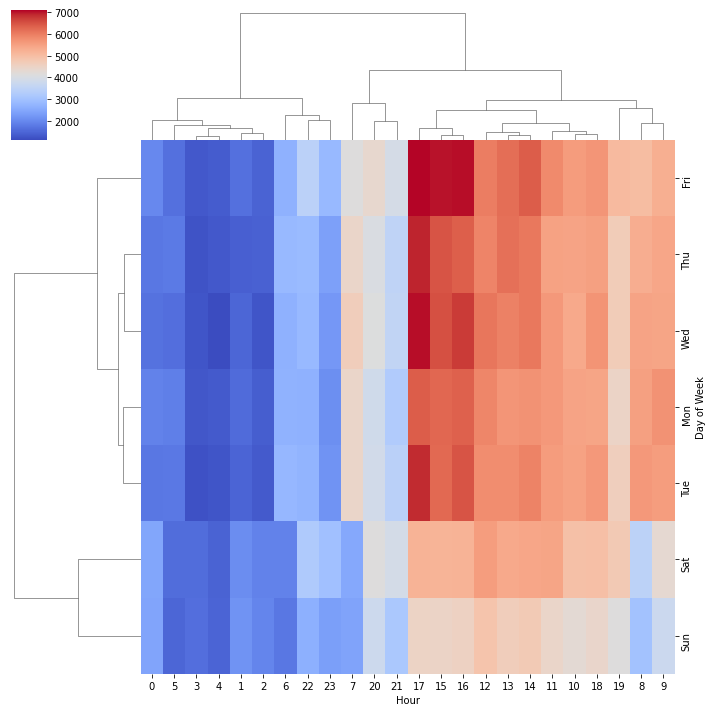

In [69]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap = 'coolwarm')

In [70]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

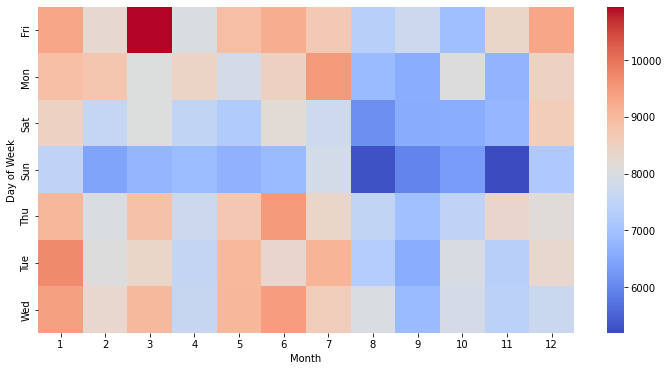

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap = 'coolwarm')

#Incidents generally happen during the first half of the year.

<Figure size 864x432 with 0 Axes>

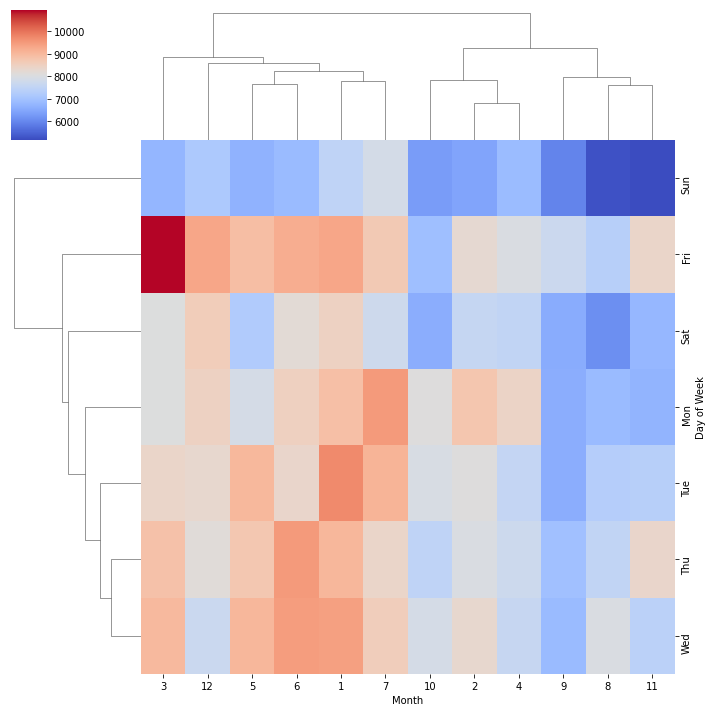

In [73]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth, cmap = 'coolwarm')

In [ ]:
#In conclusion, 911 calls do tend to happen during the first half of the year, and
#especially during the afternoon - evening period. Hence, more 911 resources should be allocated
#during these period and to the EMS department